<a href="https://colab.research.google.com/github/maskot1977/Souyaku-Dajare/blob/master/tmd2020_1_rdkit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RDKitのインストール

In [1]:
!pip install git+https://github.com/maskot1977/rdkit_installer.git

from rdkit_installer import install
install.from_miniconda()

  Cloning https://github.com/maskot1977/rdkit_installer.git to /tmp/pip-req-build-_i0uh1i1
  Running command git clone -q https://github.com/maskot1977/rdkit_installer.git /tmp/pip-req-build-_i0uh1i1
  Created wheel for rdkit-installer: filename=rdkit_installer-0.1.0-cp36-none-any.whl size=2846 sha256=742e766916690345729e11d83812c8da5402c69d7f251f9efbc549df3133bc01
  Stored in directory: /tmp/pip-ephem-wheel-cache-lqbdn3vz/wheels/22/35/68/f3dcba76a2c9080c925b783ddf87a69f63521e0378721aec73
Successfully built rdkit-installer


add /root/miniconda/lib/python3.6/site-packages to PYTHONPATH
python version: 3.6.9
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-4.7.12-Linux-x86_64.sh
done
installing miniconda to /root/miniconda
done
installing rdkit
done
rdkit-2020.03.3 installation finished!


# 化合物データのダウンロード

In [3]:
import urllib.request

url = "https://raw.githubusercontent.com/maskot1977/tmd2020/main/data_1.csv"
urllib.request.urlretrieve(url, url.split("/")[-1])

('data_1.csv', <http.client.HTTPMessage at 0x7f1635f4b080>)

# pandasのインポートとデータ読み込み

In [4]:
import pandas as pd

df = pd.read_csv('data_1.csv')
df

,PCCDB-ID,Open Babel SMILES,HOMO-LUMO gap,HOMO energy,LUMO energy,Dipole moment,Excitation energy (1st),Oscillator strength (1st),Excitation energy (2nd),Oscillator strength (2nd),Excitation energy (3rd),Oscillator strength (3rd),Excitation energy (4th),Oscillator strength (4th),Num. of H bond acceptor,Num. of H bond donor,TPSA,logP,Molecular refractivity,Melting point
0,15493,CN(CCCN1C(=CC(=C[C@@H](C1=O)C)C)C)C,5.064,-5.440,-0.376,3.07,4.378,0.1218,4.792,0.0021,4.912,0.0125,5.056,NaN,3.0,0.0,23.55,2.204,76.26,43.79
1,20139,OCc1c(C)cc(cc1C)C,6.041,-6.212,-0.171,1.69,4.995,0.0059,5.425,0.1014,5.859,0.0070,5.924,NaN,1.0,1.0,20.23,2.104,47.47,40.29
2,7039,OCc1cc(C)cc(c1O)CO,5.576,-5.742,-0.166,4.50,4.556,0.0443,5.059,0.0047,5.419,0.0096,5.583,NaN,3.0,3.0,60.69,0.685,45.69,95.04
3,18597,Oc1ccc(c(c1)C)C(C)C,5.837,-5.687,0.150,1.18,4.910,0.0316,5.027,0.0001,5.475,0.0037,5.608,NaN,1.0,1.0,20.23,2.824,48.01,51.64
4,23204,C/C/1=C\CC(C)(C)/C=C/C/C(=C\CC1)/C,6.229,-5.782,0.446,0.12,5.263,0.0250,5.411,0.0053,5.557,0.0087,5.641,NaN,0.0,0.0,0.00,5.035,70.42,44.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,12787,Oc1cc(O)c(c(c1O)C)O,5.124,-4.797,0.327,0.40,3.932,0.0000,4.237,0.0000,4.453,0.0512,4.457,NaN,4.0,4.0,80.92,0.817,39.50,171.05
629,3840,OCc1occ(c(=O)c1)O,5.154,-6.376,-1.222,3.31,3.880,0.0000,4.801,0.1048,5.141,0.0003,5.335,NaN,4.0,2.0,70.67,-0.162,33.13,101.42
630,675,Cc1cc2[nH]cnc2cc1C,5.625,-5.802,-0.177,3.34,4.834,0.0820,5.129,0.0907,5.167,0.0013,5.260,NaN,1.0,1.0,28.68,2.180,46.03,120.11
631,18598,CC(c1cccc(c1O)C)C,5.984,-5.755,0.229,1.67,5.030,0.0381,5.059,0.0018,5.625,0.0029,5.670,NaN,1.0,1.0,20.23,2.824,48.01,51.64


# RDKitを使った化学フォーマット変換

In [5]:
smile = df['Open Babel SMILES'][0]
smile

'CN(CCCN1C(=CC(=C[C@@H](C1=O)C)C)C)C'

In [6]:
from rdkit import Chem

mol = Chem.MolFromSmiles(smile)
mol

In [7]:
mol.SetProp("_Name","This is an amazing molecule.")
molblock = Chem.MolToMolBlock(mol)
print(molblock)

This is an amazing molecule.
     RDKit          2D

 17 17  0  0  0  0  0  0  0  0999 V2000
    7.7286   -2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.2286   -2.5981    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    5.4786   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.9786   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.2286   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7286    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.0777    1.3515    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3846    1.6852    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5574    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5574   -0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3846   -1.6852    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.0777   -1.3515    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0130   -2.5242    0.0000 O   0  0  0  0  0  0  0  0  0  0  0 

In [8]:
inchi = Chem.MolToInchi(mol)
inchi

'InChI=1S/C14H24N2O/c1-11-9-12(2)14(17)16(13(3)10-11)8-6-7-15(4)5/h9-10,12H,6-8H2,1-5H3/t12-/m0/s1'

In [9]:
mol = Chem.AddHs(mol)
molblock = Chem.MolToMolBlock(mol)
print(molblock)

This is an amazing molecule.
     RDKit          2D

 41 41  0  0  0  0  0  0  0  0999 V2000
    8.4786   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.7286    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    6.2286    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.7286    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.2286   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7286    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.0777    1.3515    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3846    1.6852    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5574    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5574   -0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3846   -1.6852    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.0777   -1.3515    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7103   -1.9715    0.0000 O   0  0  0  0  0  0  0  0  0  0  0 

In [10]:
mol = Chem.RemoveHs(mol)
molblock = Chem.MolToMolBlock(mol)
print(molblock)

This is an amazing molecule.
     RDKit          2D

 17 17  0  0  0  0  0  0  0  0999 V2000
    7.7286   -2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.2286   -2.5981    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    5.4786   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.9786   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.2286   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7286    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.0777    1.3515    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3846    1.6852    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5574    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5574   -0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3846   -1.6852    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.0777   -1.3515    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0130   -2.5242    0.0000 O   0  0  0  0  0  0  0  0  0  0  0 

In [11]:
print(Chem.MolToMolBlock(mol),file=open('amazing.mol','w+'))

# 描画

In [12]:
from rdkit.Chem import Draw

Chem.Draw.MolToFile(mol,'amazing.png')

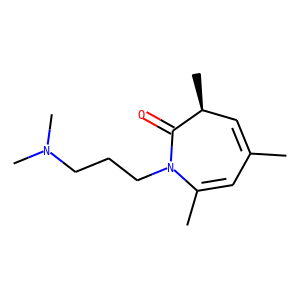

In [13]:
Draw.MolToImage(mol)

In [14]:
mols = []
for smile, id in zip(df['Open Babel SMILES'], df['PCCDB-ID']):
    mol = Chem.MolFromSmiles(smile)
    mol.SetProp("_Name", str(id))
    mols.append(mol)

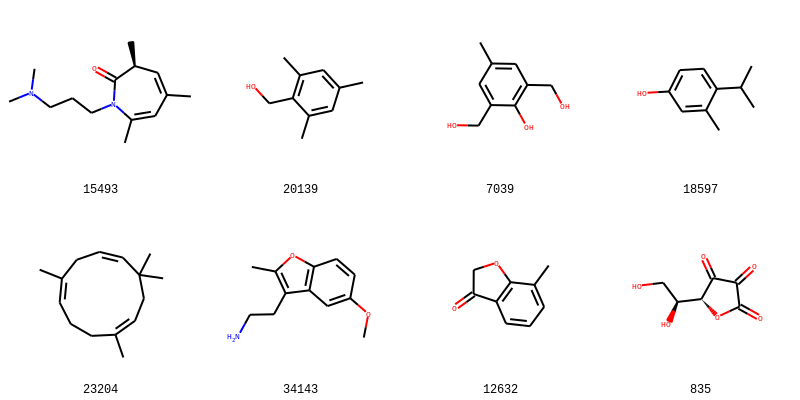

In [15]:
x_start = 0
x_end = 8
Draw.MolsToGridImage(
    mols[x_start:x_end],
    molsPerRow=4,
    subImgSize=(200,200),
    legends=[x.GetProp("_Name") for x in mols[x_start:x_end]]
             )

In [16]:
img = Draw.MolsToGridImage(
    mols[x_start:x_end],
    molsPerRow=4,
    subImgSize=(200,200),
    legends=[x.GetProp("_Name") for x in mols[x_start:x_end]]
             )

img.save('amazing_grid.png')

# 部分構造検索

In [17]:
smile = df['Open Babel SMILES'][1]
smile

'OCc1c(C)cc(cc1C)C'

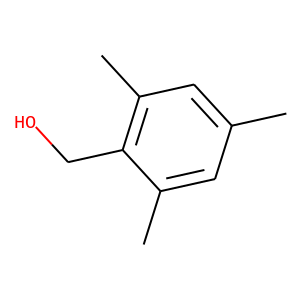

In [18]:
mol = Chem.MolFromSmiles(smile)
Draw.MolToImage(mol)

In [19]:
patt = Chem.MolFromSmarts('cc(C)cc')

In [20]:
mol.GetSubstructMatch(patt)

(2, 3, 4, 5, 6)

In [21]:
mol.GetSubstructMatches(patt)

((2, 3, 4, 5, 6),
 (2, 8, 9, 7, 6),
 (3, 2, 1, 8, 7),
 (5, 3, 4, 2, 8),
 (5, 6, 10, 7, 8),
 (7, 6, 10, 5, 3),
 (7, 8, 9, 2, 3),
 (8, 2, 1, 3, 5))

In [22]:
mols = []
patt = Chem.MolFromSmarts('c1ccccc1')
for smile, id in zip(df['Open Babel SMILES'], df['PCCDB-ID']):
    mol = Chem.MolFromSmiles(smile)
    mol.SetProp("_Name", str(id))
    if mol.HasSubstructMatch(patt):
        mols.append(mol)

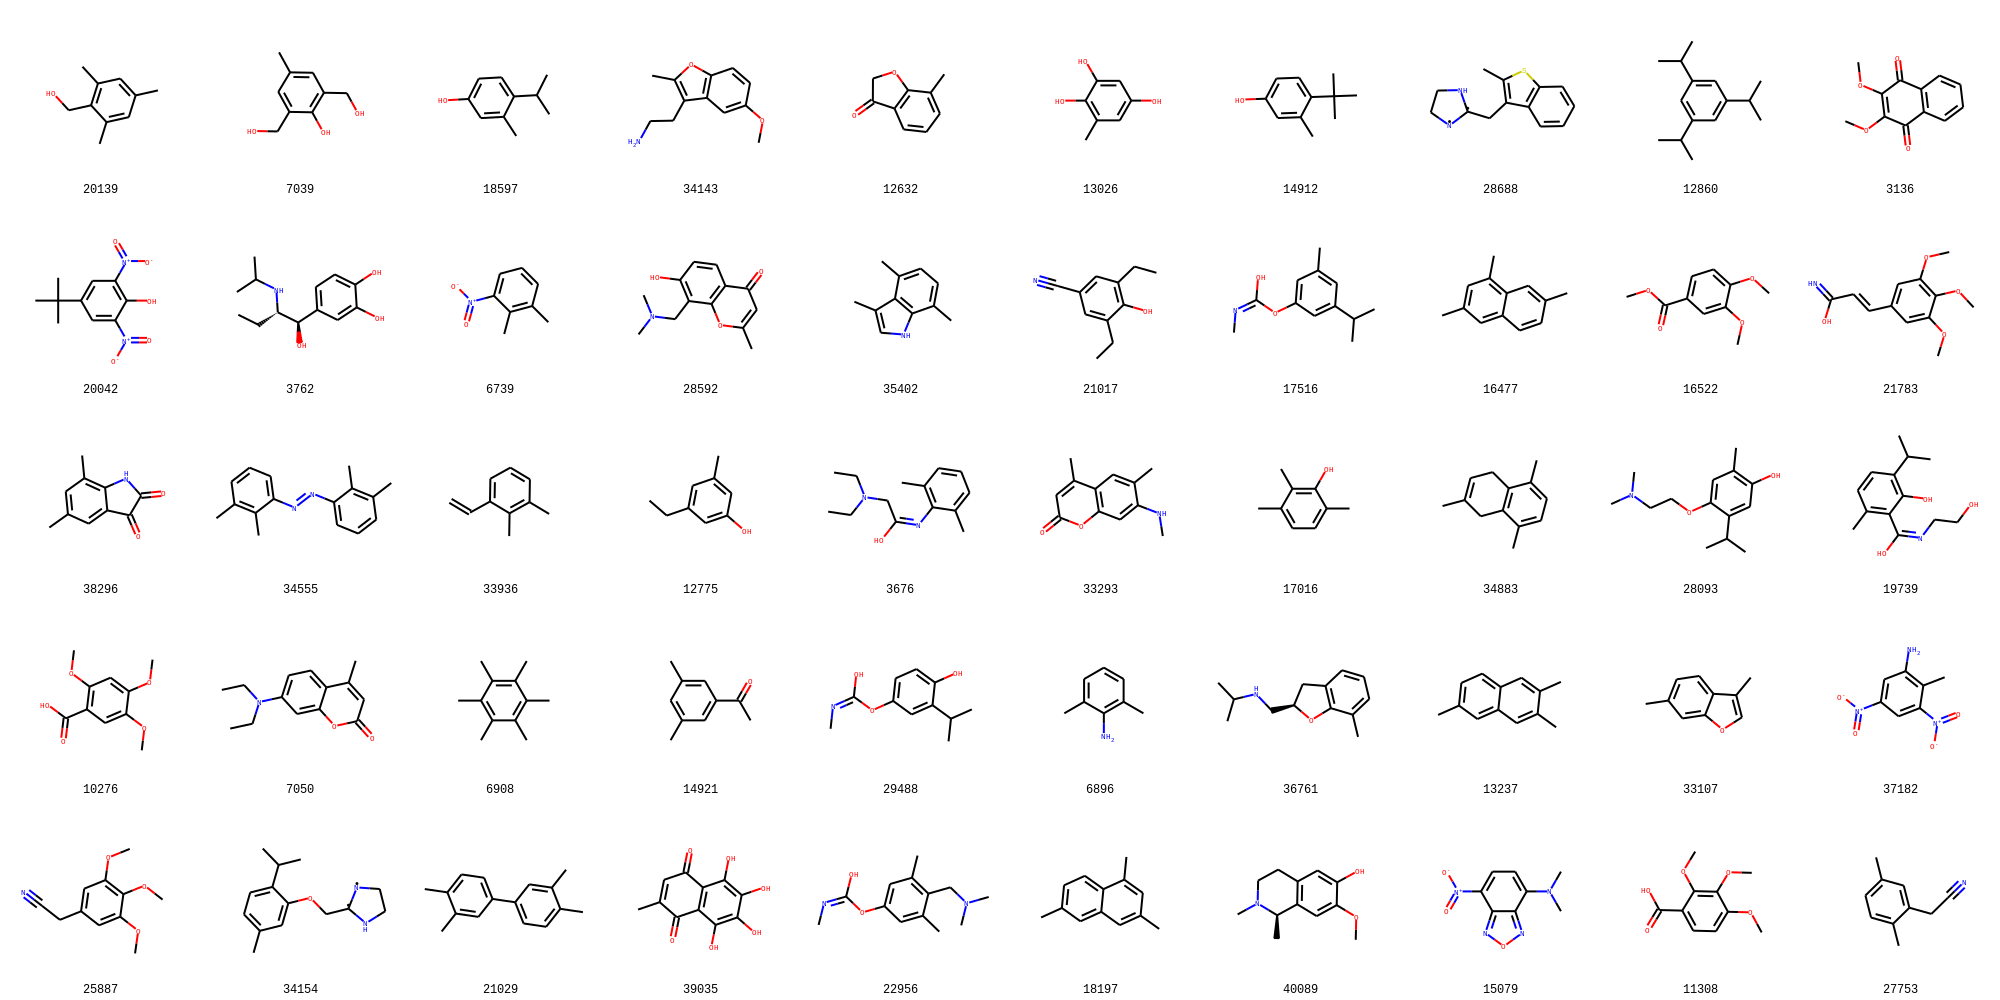

In [23]:
x_start = 0
x_end = 50
Draw.MolsToGridImage(
    mols[x_start:x_end],
    molsPerRow=10,
    subImgSize=(200,200),
    legends=[x.GetProp("_Name") for x in mols[x_start:x_end]]
             )

In [24]:
ids1 = []
patt = Chem.MolFromSmarts('c1ccccc1')
for smile, id in zip(df['Open Babel SMILES'], df['PCCDB-ID']):
    mol = Chem.MolFromSmiles(smile)
    mol.SetProp("_Name", str(id))
    if mol.HasSubstructMatch(patt):
        ids1.append(id)

print(len(ids1))

408


In [25]:
ids2 = []
patt = Chem.MolFromSmiles('c1ccccc1')
for smile, id in zip(df['Open Babel SMILES'], df['PCCDB-ID']):
    mol = Chem.MolFromSmiles(smile)
    mol.SetProp("_Name", str(id))
    if mol.HasSubstructMatch(patt):
        ids2.append(id)

print(len(ids2))

407


In [26]:
set(ids1) - set(ids2)

{1384}

COc1cc2c(CO)[nH]ccc2cc1=O


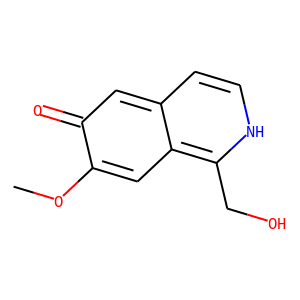

In [29]:
smile = list(df[df['PCCDB-ID'] == 1384]['Open Babel SMILES'])[0]
print(smile)
mol = Chem.MolFromSmiles(smile)
Draw.MolToImage(mol)

4


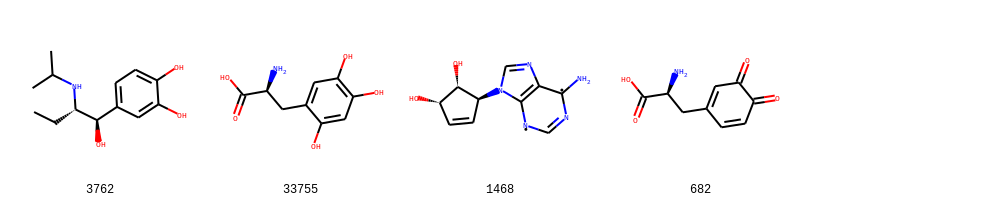

In [30]:
mols = []
patt = Chem.MolFromSmiles('C[C@H](N)CO')
for smile, id in zip(df['Open Babel SMILES'], df['PCCDB-ID']):
    mol = Chem.MolFromSmiles(smile)
    mol.SetProp("_Name", str(id))
    if mol.HasSubstructMatch(patt ,useChirality=True):
        mols.append(mol)

print(len(mols))

x_start = 0
x_end = 5
Draw.MolsToGridImage(
    mols[x_start:x_end],
    molsPerRow=5,
    subImgSize=(200,200),
    legends=[x.GetProp("_Name") for x in mols[x_start:x_end]]
             )

1


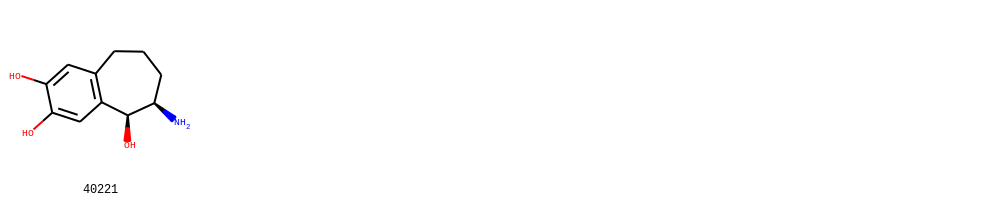

In [31]:
mols = []
patt = Chem.MolFromSmiles('C[C@@H](N)CO')
for smile, id in zip(df['Open Babel SMILES'], df['PCCDB-ID']):
    mol = Chem.MolFromSmiles(smile)
    mol.SetProp("_Name", str(id))
    if mol.HasSubstructMatch(patt, useChirality=True):
        mols.append(mol)

print(len(mols))

x_start = 0
x_end = 5
Draw.MolsToGridImage(
    mols[x_start:x_end],
    molsPerRow=5,
    subImgSize=(200,200),
    legends=[x.GetProp("_Name") for x in mols[x_start:x_end]]
             )

# 記述子

CN(CCCN1C(=CC(=C[C@@H](C1=O)C)C)C)C


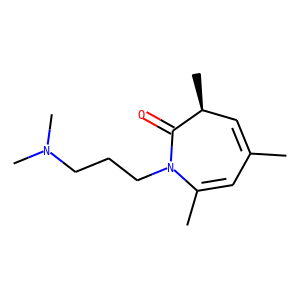

In [32]:
smile = df['Open Babel SMILES'][0]
print(smile)
mol = Chem.MolFromSmiles(smile)
Draw.MolToImage(mol)

In [33]:
from rdkit.Chem import Descriptors
Descriptors.TPSA(mol)

23.55

In [34]:
Descriptors.MolLogP(mol)

2.2664999999999997

In [35]:
from rdkit.Chem import AllChem

AllChem.ComputeGasteigerCharges(mol)
for id, atom in enumerate(mol.GetAtoms()):
    print(id + 1, atom.GetAtomicNum(), atom.GetProp('_GasteigerCharge'))

1 6 -0.0136943963308498
2 7 -0.30933200208057476
3 6 -0.00078220155210439492
4 6 -0.022188692255721464
5 6 0.026681648229412099
6 7 -0.31593906761689189
7 6 0.017865227318612249
8 6 -0.040193690176393966
9 6 -0.052619564463596336
10 6 -0.069408079465383604
11 6 0.054212735936674597
12 6 0.23287165212981889
13 8 -0.27385394314736827
14 6 -0.050057930798772139
15 6 -0.040001109239784977
16 6 -0.024124461778980061
17 6 -0.0136943963308498


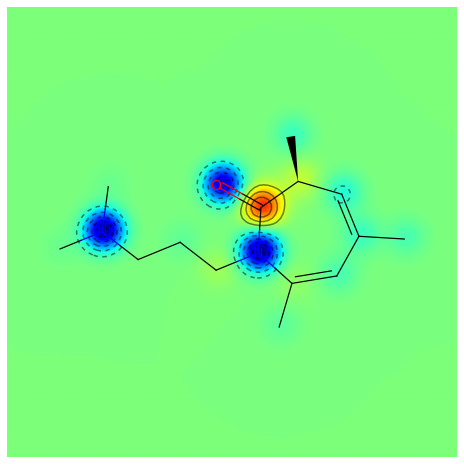

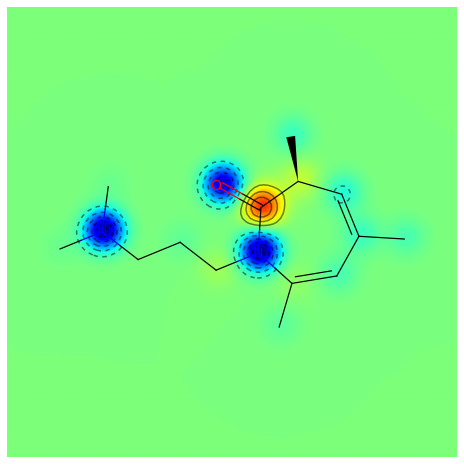

In [ ]:
from rdkit.Chem.Draw import SimilarityMaps

AllChem.ComputeGasteigerCharges(mol)
contribs = [float(mol.GetAtomWithIdx(i).GetProp('_GasteigerCharge')) for i in range(mol.GetNumAtoms())]
SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, colorMap='jet', contourLines=10)

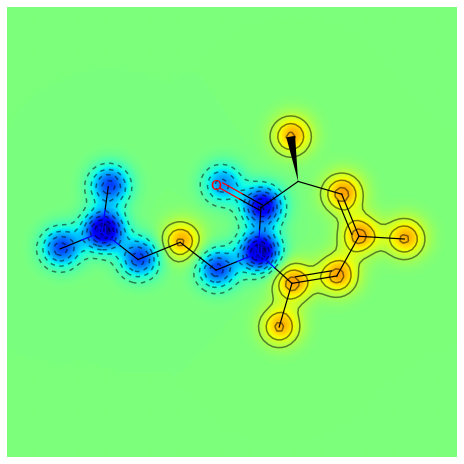

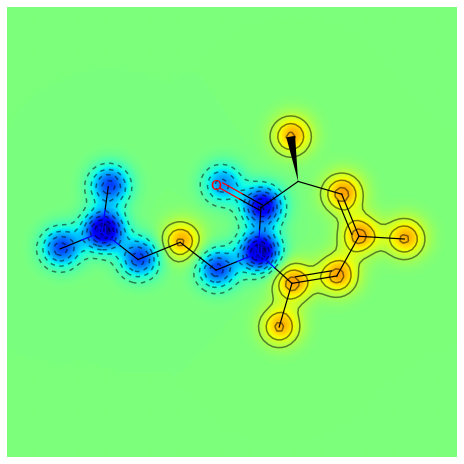

In [ ]:
from rdkit.Chem import rdMolDescriptors
contribs = rdMolDescriptors._CalcCrippenContribs(mol)
SimilarityMaps.GetSimilarityMapFromWeights(mol,[x for x,y in contribs], colorMap='jet', contourLines=10)

# recap

CN(CCCN1C(=CC(=C[C@@H](C1=O)C)C)C)C


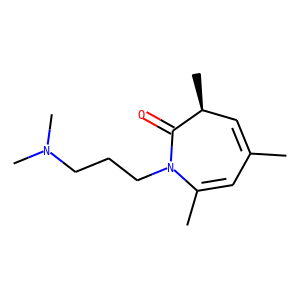

In [ ]:
smile = df['Open Babel SMILES'][0]
print(smile)
mol = Chem.MolFromSmiles(smile)
Draw.MolToImage(mol)

In [ ]:
from rdkit.Chem import Recap

hierarch = Recap.RecapDecompose(mol)
type(hierarch)

rdkit.Chem.Recap.RecapHierarchyNode

In [ ]:
hierarch.smiles

'CC1=C[C@H](C)C(=O)N(CCCN(C)C)C(C)=C1'

In [ ]:
ks=hierarch.children
ks

{'*CCCN(C)C': <rdkit.Chem.Recap.RecapHierarchyNode at 0x7f9dae0ede10>,
 '*N1C(=O)[C@@H](C)C=C(C)C=C1C': <rdkit.Chem.Recap.RecapHierarchyNode at 0x7f9dae0edd68>}

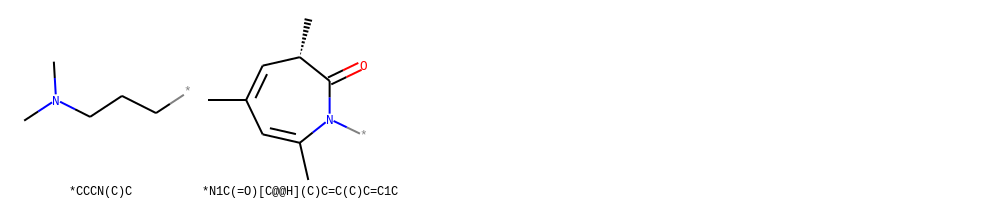

In [ ]:
Draw.MolsToGridImage(
    [Chem.MolFromSmiles(k) for k in ks.keys()],
    molsPerRow=5,
    subImgSize=(200,200),
    legends=list(ks.keys())
             )

# BRICS

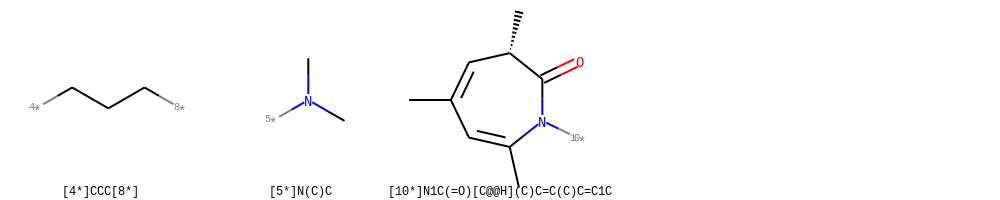

In [ ]:
from rdkit.Chem import BRICS

fragments = BRICS.BRICSDecompose(mol)

Draw.MolsToGridImage(
    [Chem.MolFromSmiles(k) for k in list(fragments)],
    molsPerRow=5,
    subImgSize=(200,200),
    legends=list(fragments)
             )

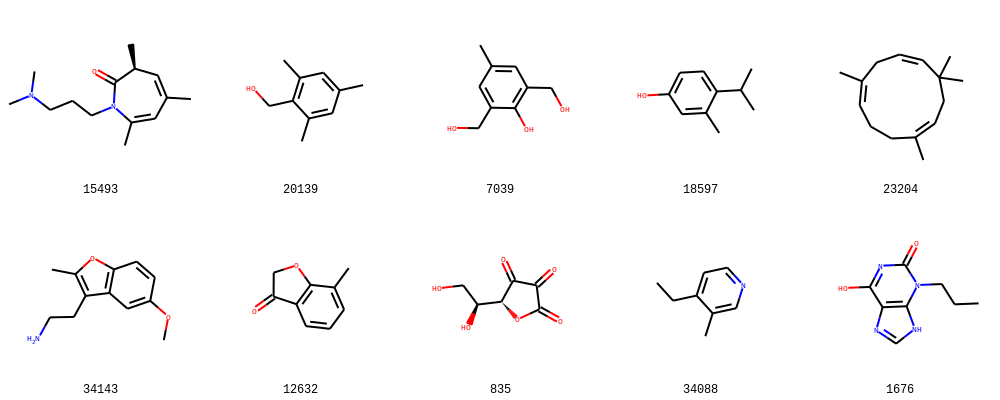

In [ ]:
mols = []
for smile, id in zip(df['Open Babel SMILES'], df['PCCDB-ID']):
    mol = Chem.MolFromSmiles(smile)
    mol.SetProp("_Name", str(id))
    mols.append(mol)

x_start = 0
x_end = 10
Draw.MolsToGridImage(
    mols[x_start:x_end],
    molsPerRow=5,
    subImgSize=(200,200),
    legends=[x.GetProp("_Name") for x in mols[x_start:x_end]]
             )

19


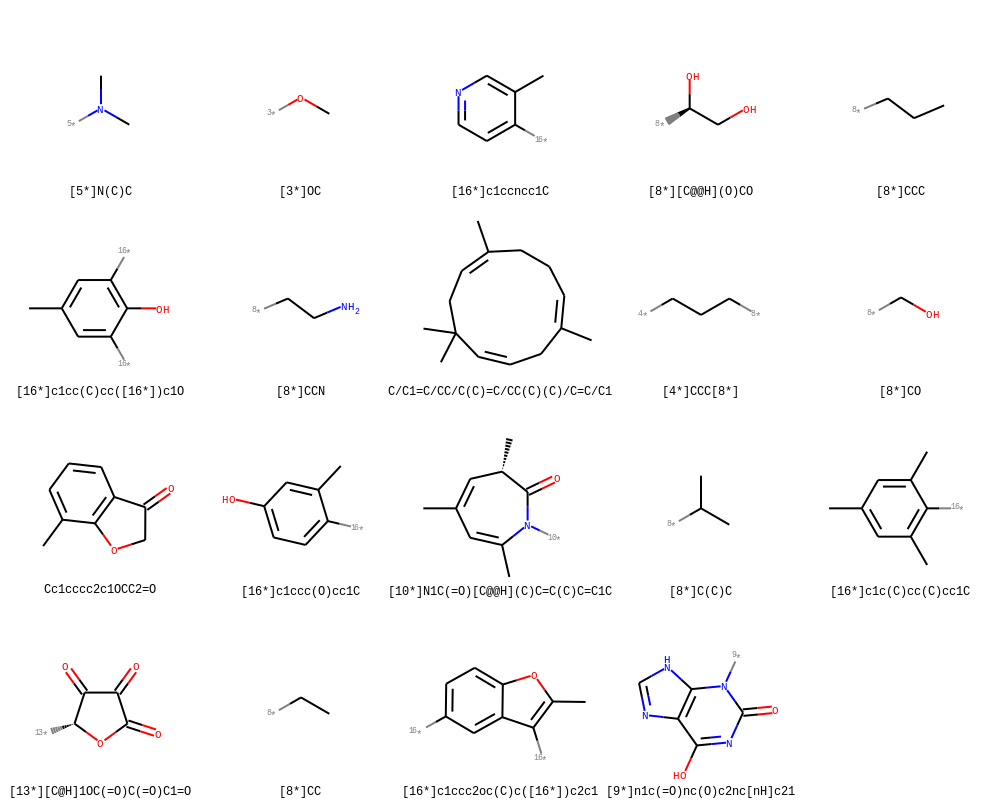

In [ ]:
allfrags=set()
for mol in mols[x_start:x_end]:
    fragment = BRICS.BRICSDecompose(mol)
    allfrags.update(fragment)

print(len(allfrags))

Draw.MolsToGridImage(
    [Chem.MolFromSmiles(f) for f in allfrags],
    molsPerRow=5,
    subImgSize=(200,200),
    legends=list(allfrags)
             )

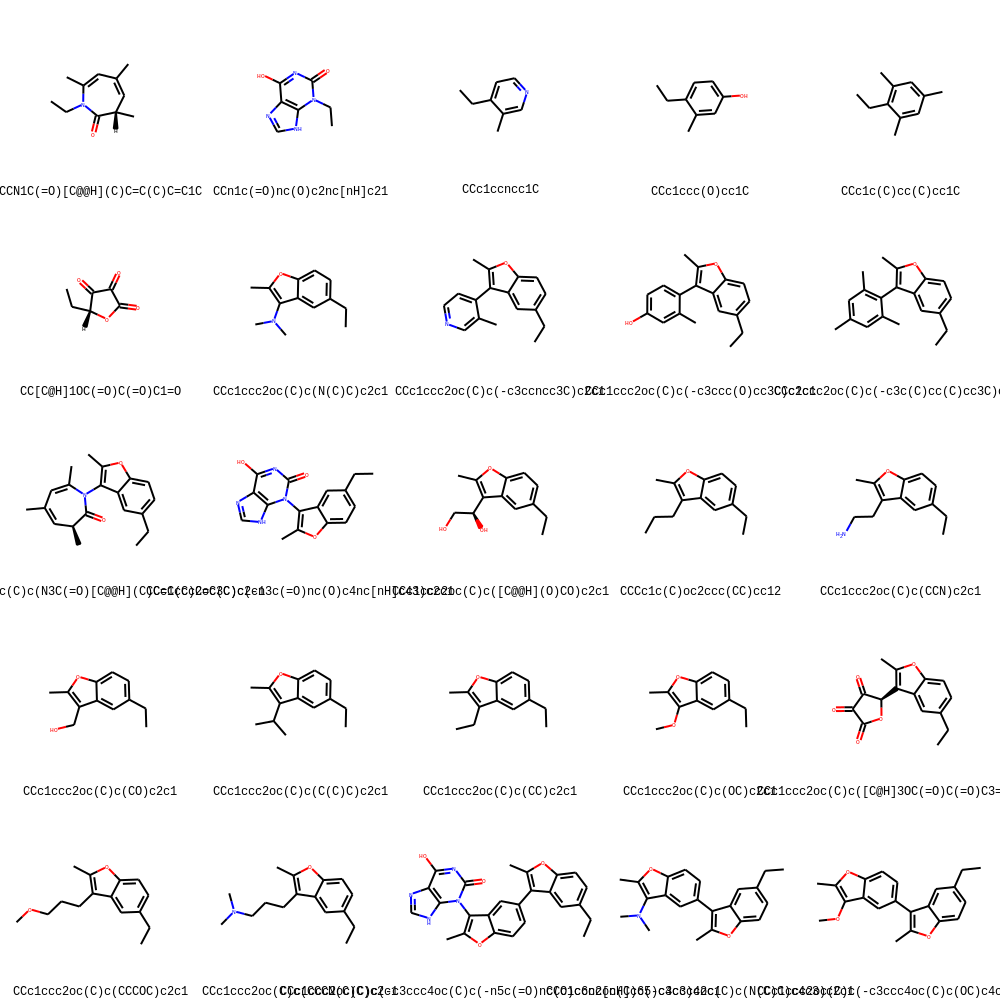

In [ ]:
fragms = [Chem.MolFromSmiles(x) for x in allfrags]

products = []
for mol in BRICS.BRICSBuild(fragms):
    mol.UpdatePropertyCache(strict=False)
    products.append(mol)
    if len(products) >= 25:
        break

Draw.MolsToGridImage(
    products,
    molsPerRow=5,
    subImgSize=(200,200),
    legends=[Chem.MolToSmiles(mol) for mol in products]
             )

# 化学的特徴

CN(CCCN1C(=CC(=C[C@@H](C1=O)C)C)C)C


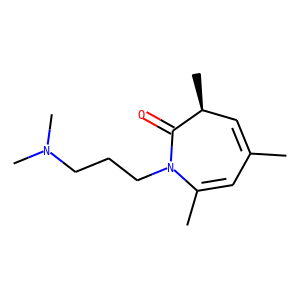

In [ ]:
smile = df['Open Babel SMILES'][0]
print(smile)
mol = Chem.MolFromSmiles(smile)
Draw.MolToImage(mol)

In [ ]:
import os
from rdkit import RDConfig
from rdkit.Chem import ChemicalFeatures
fdefName = os.path.join(RDConfig.RDDataDir,'BaseFeatures.fdef')
factory = ChemicalFeatures.BuildFeatureFactory(fdefName)

In [ ]:
for i, feat in enumerate(factory.GetFeaturesForMol(mol)):
    print(i, feat.GetFamily(), feat.GetType(), feat.GetAtomIds())

0 Donor SingleAtomDonor (1,)
1 Donor SingleAtomDonor (5,)
2 Acceptor SingleAtomAcceptor (12,)
3 PosIonizable BasicGroup (1,)
4 Hydrophobe ThreeWayAttach (8,)
5 Hydrophobe ThreeWayAttach (10,)
6 Hydrophobe ChainTwoWayAttach (3,)


OCc1c(C)cc(cc1C)C


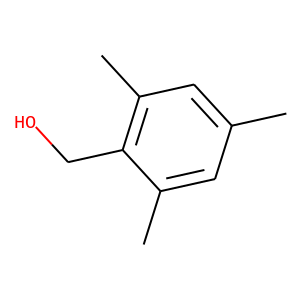

In [ ]:
smile = df['Open Babel SMILES'][1]
print(smile)
mol = Chem.MolFromSmiles(smile)
Draw.MolToImage(mol)

In [ ]:
for i, feat in enumerate(factory.GetFeaturesForMol(mol)):
    print(i, feat.GetFamily(), feat.GetType(), feat.GetAtomIds())

0 Donor SingleAtomDonor (0,)
1 Acceptor SingleAtomAcceptor (0,)
2 Aromatic Arom6 (2, 3, 5, 6, 7, 8)
3 Hydrophobe ThreeWayAttach (2,)
4 Hydrophobe ThreeWayAttach (3,)
5 Hydrophobe ThreeWayAttach (6,)
6 Hydrophobe ThreeWayAttach (8,)
7 LumpedHydrophobe RH6_6 (2, 3, 5, 6, 7, 8)


# 2Dファーマコフォアフィンガープリント

In [ ]:
from rdkit import Chem
from rdkit.Chem import ChemicalFeatures
#fdefName = 'data/MinimalFeatures.fdef'
fdefName = os.path.join(RDConfig.RDDataDir,'BaseFeatures.fdef')
featFactory = ChemicalFeatures.BuildFeatureFactory(fdefName)

In [ ]:
!ls /root/miniconda/share/RDKit/Data/

BaseFeatures.fdef  FragmentDescriptors.csv	   NCI		RDTests.sqlt
Crippen.txt	   Functional_Group_Hierarchy.txt  Pains	Salts.txt
DTDs		   FunctionalGroups.txt		   rddata.sql	SmartsLib
eht_parms.dat	   MolStandardize		   RDData.sqlt	struchk


In [ ]:
from rdkit.Chem.Pharm2D.SigFactory import SigFactory
sigFactory = SigFactory(featFactory,minPointCount=2,maxPointCount=3)
sigFactory.SetBins([(0,2),(2,5),(5,8)])
sigFactory.Init()
sigFactory.GetSigSize()

2988

In [ ]:
from rdkit.Chem.Pharm2D import Generate
fp = Generate.Gen2DFingerprint(mol,sigFactory)
len(fp)

2988

In [ ]:
fp.GetNumOnBits()

19

In [ ]:
for bit in list(fp.GetOnBits()):
    print(bit, sigFactory.GetBitDescription(bit))

4 Acceptor Aromatic |0 1|1 0|
10 Acceptor Hydrophobe |0 1|1 0|
11 Acceptor Hydrophobe |0 2|2 0|
13 Acceptor LumpedHydrophobe |0 1|1 0|
28 Aromatic Donor |0 1|1 0|
49 Donor Hydrophobe |0 1|1 0|
50 Donor Hydrophobe |0 2|2 0|
52 Donor LumpedHydrophobe |0 1|1 0|
63 Hydrophobe Hydrophobe |0 0|0 0|
64 Hydrophobe Hydrophobe |0 1|1 0|
622 Acceptor Hydrophobe Hydrophobe |0 1 1|1 0 0|1 0 0|
623 Acceptor Hydrophobe Hydrophobe |0 1 1|1 0 1|1 1 0|
631 Acceptor Hydrophobe Hydrophobe |0 2 1|2 0 1|1 1 0|
1798 Donor Hydrophobe Hydrophobe |0 1 1|1 0 0|1 0 0|
1799 Donor Hydrophobe Hydrophobe |0 1 1|1 0 1|1 1 0|
1807 Donor Hydrophobe Hydrophobe |0 2 1|2 0 1|1 1 0|
2155 Hydrophobe Hydrophobe Hydrophobe |0 1 0|1 0 0|0 0 0|
2158 Hydrophobe Hydrophobe Hydrophobe |0 1 1|1 0 0|1 0 0|
2159 Hydrophobe Hydrophobe Hydrophobe |0 1 1|1 0 1|1 1 0|


In [ ]:
from rdkit import Chem
from rdkit.Chem.Pharm2D import Gobbi_Pharm2D,Generate
fp = Generate.Gen2DFingerprint(mol, Gobbi_Pharm2D.factory)
fp.GetNumOnBits()

15

In [ ]:
for bit in list(fp.GetOnBits()):
    print(bit, Gobbi_Pharm2D.factory.GetBitDescription(bit))

56 AR AR |0 0|0 0|
57 AR AR |0 1|1 0|
70 AR HA |0 0|0 0|
71 AR HA |0 1|1 0|
73 AR HA |0 3|3 0|
77 AR HD |0 0|0 0|
78 AR HD |0 1|1 0|
80 AR HD |0 3|3 0|
12168 AR AR AR |0 0 0|0 0 0|0 0 0|
12836 AR AR HA |0 0 1|0 0 1|1 1 0|
12849 AR AR HA |0 0 3|0 0 1|3 1 0|
12893 AR AR HA |0 1 3|1 0 0|3 0 0|
13167 AR AR HD |0 0 1|0 0 1|1 1 0|
13180 AR AR HD |0 0 3|0 0 1|3 1 0|
13224 AR AR HD |0 1 3|1 0 0|3 0 0|


# 分子フラグメント

In [ ]:
!cat /root/miniconda/share/RDKit/Data/FunctionalGroups.txt

// Copyright (C) 2003 Rational Discovery LLC
//  This file is part of the RDKit.
//  The contents are covered by the terms of the BSD license
//  which is included in the file license.txt, found at the root
//  of the RDKit source tree.
// NOTES:
//  - larger functional groups should come before smaller ones involving
//    the same core atom
//  - the first atom in the SMARTS query is not part of the group itself
//  - it is essential that the fields in this file be separated by tabs
//    (not spaces).
//
//   Label	SMARTS	Notes
//--------------------------------------------------

-NC(=O)CH3	*-[N;D2]-[C;D3](=O)-[C;D1;H3]	methyl amide
-C(=O)O	*-C(=O)[O;D1]	carboxylic acids
-C(=O)OMe	*-C(=O)[O;D2]-[C;D1;H3]	carbonyl methyl ester
-C(=O)H	*-C(=O)-[C;D1]	terminal aldehyde
-C(=O)N	   *-C(=O)-[N;D1]		amide
-C(=O)CH3	*-C(=O)-[C;D1;H3]	carbonyl methyl
-N=C=O	   *-[N;D2]=[C;D2]=[O;D1]	isocyanate
-N=C=S	   *-[N;D2]=[C;D2]=[S;D1]	isothiocyanate

//-----------------------------------------------

In [ ]:
!cat /root/miniconda/share/RDKit/Data/Functional_Group_Hierarchy.txt

// $Id: Functional_Group_Hierarchy.txt 10346 2013-07-04 14:53:03Z landrgr1 $
// Created by Greg Landrum, October 2006
//  Format: Name\tSmarts\tLabel\tRemovalReaction (optional)
//
//  NOTES:
//     1) be sure to make the distinguishing feature of the functional group
//        the first atom in the pattern
//     2) the RemovalReaction (if present) is used to remove the functional
//        group from the molecule. This is necessary for cases like boronic
//        ethers where the full functional group cannot be specified in SMARTS.
//
AcidChloride	C(=O)Cl	Acid Chloride
  AcidChloride.Aromatic	[$(C-!@[a])](=O)(Cl)	Aromatic
  AcidChloride.Aliphatic	[$(C-!@[A;!Cl])](=O)(Cl)	Aliphatic

CarboxylicAcid	C(=O)[O;H,-]	Carboxylic acid
  CarboxylicAcid.Aromatic	[$(C-!@[a])](=O)([O;H,-])	Aromatic
  CarboxylicAcid.Aliphatic	[$(C-!@[A;!O])](=O)([O;H,-])	Aliphatic
  CarboxylicAcid.AlphaAmino	[$(C-[C;!$(C=[!#6])]-[N;!H0;!$(N-[!#6;!#1]);!$(N-C=[O,N,S])])](=O)([O;H,-])	alpha Amino Acid

SulfonylChlor

In [ ]:
fName=os.path.join(RDConfig.RDDataDir,'FunctionalGroups.txt')
from rdkit.Chem import FragmentCatalog
fparams = FragmentCatalog.FragCatParams(1,6,fName)
fparams.GetNumFuncGroups()

39

In [ ]:
fcat=FragmentCatalog.FragCatalog(fparams)
fcgen=FragmentCatalog.FragCatGenerator()
fcgen.AddFragsFromMol(mol, fcat)

51

In [ ]:
fcat.GetEntryDescription(0)

'C<-O>c'

In [ ]:
AllChem.EmbedMolecule(mol)

0